In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
#Para recordarnos lo que estamos viendo, visualizaremos los primeros puntos de datos

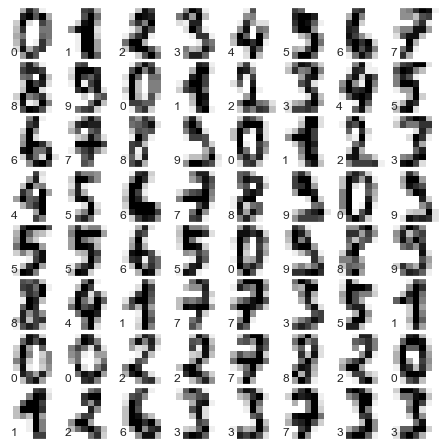

In [3]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
#Podemos clasificar rápidamente los dígitos usando un bosque aleatorio de la siguiente manera

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
#Podemos echar un vistazo al informe de clasificación de este clasificador:

In [10]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
#Y por si acaso, trace la matriz de confusión.

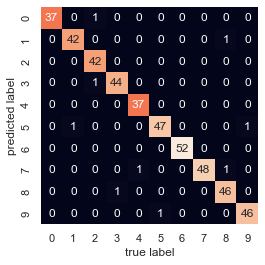

In [11]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
#Encontramos que un bosque aleatorio simple y sin sintonizar da como resultado una clasificación muy precisa de los datos de dígitos.

In [ ]:
#CONCLUSION : un conjunto de árboles de decisión aleatorios. Los bosques aleatorios son un método poderoso con varias ventajas:

Tanto el entrenamiento como la predicción son muy rápidos debido a la simplicidad de los árboles de decisión subyacentes. Además, ambas tareas se pueden paralelizar directamente, porque los árboles individuales son entidades totalmente independientes.

El modelo no paramétrico es extremadamente flexible y, por lo tanto, puede funcionar bien en tareas que otros estimadores no se ajustan bien.